# Cambio de variable v
## integral 1: sin f(u)
### derivada a: ajuste 13

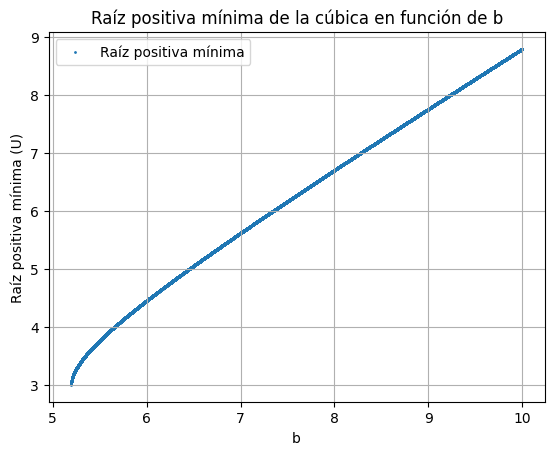

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los coeficientes de la cúbica
def coeficientes_cubica(b, m):
    # Ecuación: -2*m*b^2*u^3 + b^2*u^2 + 0*u - 1 = 0
    return [1, 0, -b**2, 2*m*b**2]

# Parámetros
m = 1
inicio = 3 * (3**(1/2)) * m
fin = 10 * m
paso = 0.0001
valores_b = np.arange(inicio, fin, paso)


# Lista para almacenar las raíces positivas más pequeñas
valores_r_minima = []

#Para cada valor de se resuelve ecuacion cubica para u
for b in valores_b:
    coefs = coeficientes_cubica(b, m)
    # Encontrar todas las raíces (reales y complejas)
    raices = np.roots(coefs)
    # Filtrar raíces reales positivas
    raices_reales_positivas = raices[np.isreal(raices) & (raices.real > 0)].real
    # Seleccionar la raíz positiva más pequeña si existe
    if len(raices_reales_positivas) > 0:
        raiz_minima = max(raices_reales_positivas)
        valores_r_minima.append(raiz_minima)
    else:
        # Si no hay raíces positivas, agregar NaN
        valores_r_minima.append(np.nan)

# Graficar los resultados
valores_r_minima = np.array(valores_r_minima)
plt.scatter(valores_b, valores_r_minima, label="Raíz positiva mínima", s=1)
plt.xlabel("b")
plt.ylabel("Raíz positiva mínima (U)")
plt.title("Raíz positiva mínima de la cúbica en función de b")
plt.legend()
plt.grid()
plt.show()

C:\Users\esme_\AppData\Local\Temp\ipykernel_14288\1694730888.py:15: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_result, _ = quad(integrando_2, 0, 1, args=(r_0,b, m,))


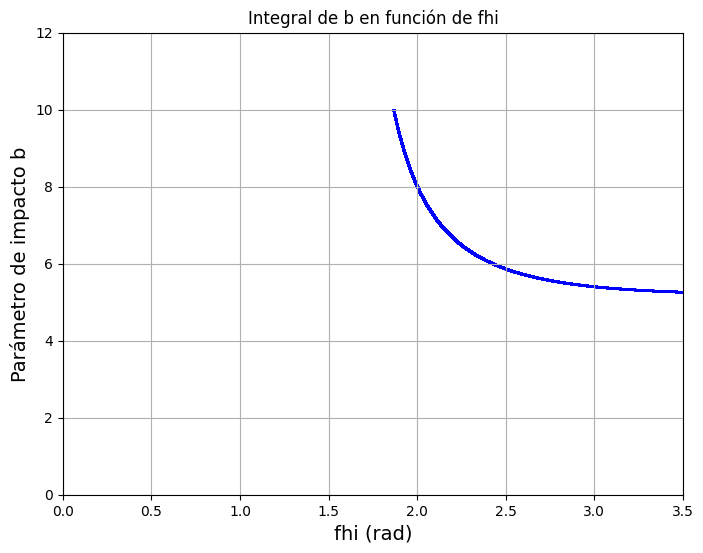

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
def integrando_2(u,r_0, b, m):
    un = r_0**2 / (4*u**2 * b**2) - 1/(4*u**2)*(1 - u**2)**2 * (1 - 2 * m * (1 - u**2)/r_0)
    #para evitar que salgan imaginarios en la raiz
    if un <= 0:
        return 0
    return 1 / np.sqrt(un)

# Función para calcular la integral
def fhi_b_corrected_1(b, m,r_0):
    try:
        # Realizar la integración
        integral_result, _ = quad(integrando_2, 0, 1, args=(r_0,b, m,))
        return integral_result
    except Exception as e:
        print(f"Error durante la integración para b={b}: {e}")
        return np.nan  # Devuelve NaN si hay un error

# Parámetros
m = 1

#para cada valor de u critica y su b manda a llamar fhi_b_corrected osea calcula la integral
fhi_values_1 = [fhi_b_corrected_1(b, m,valores_r_minima[i]) for i, b in enumerate(valores_b)]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(fhi_values_1,valores_b, color='blue', s=1)
plt.ylabel("Parámetro de impacto b", fontsize=14)
plt.xlabel("fhi (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 12)  # Ajustar el límite superior del eje y para una mejor visualización
plt.title("Integral de b en función de fhi")
plt.show()

In [3]:
len(fhi_values_1)


48039

In [4]:

def du_dphi(r_0,b,u,m):
    return (r_0**2)/(4*u**2 * b**2) - (1/(4*u**2))*(1 - u**2)**2 * (1 - (2*m*(1-u**2))/r_0)

In [5]:
r_0 = 3
b_c = 3*np.sqrt(3)*m
u = np.linspace(0.1,1,1000)

du_dp = du_dphi(r_0,b_c,u,m) 

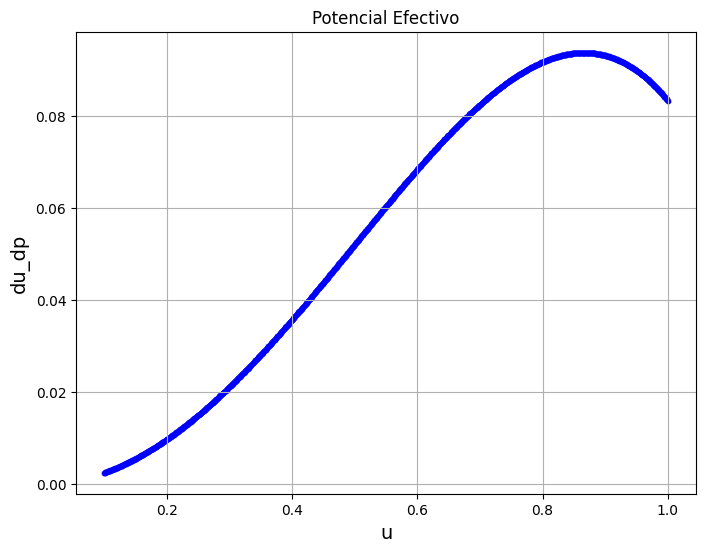

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(u, du_dp, color='blue', s=10)
plt.ylabel("du_dp", fontsize=14)
plt.xlabel("u", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.title("Potencial Efectivo")
plt.show()

array([35.33674876, 10.45810995,  9.76503653, ...,  0.59041824,
        0.59040917,  0.5904001 ])

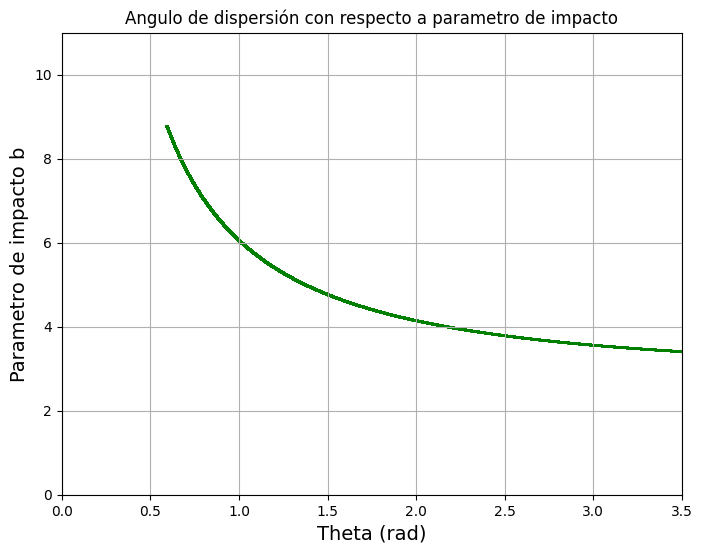

In [7]:
#CALCULO DE THETA=2phi-pi
theta_values_1 = 2*np.array(fhi_values_1) - np.pi
display(theta_values_1)
plt.figure(figsize=(8, 6))
plt.scatter(theta_values_1, valores_r_minima, color='green', s=1)
plt.ylabel("Parametro de impacto b", fontsize=14)
plt.xlabel("Theta (rad)", fontsize=14)
plt.grid(True)
plt.ylim(0, 11)
plt.xlim(0, 3.5)
plt.title("Angulo de dispersión con respecto a parametro de impacto")
plt.show()


In [8]:
k = 0
theta_values_2 = []
b_values_2 = []
for i in range (len(theta_values_1)):
    if theta_values_1[i] <= np.pi and theta_values_1[i] >= 0:
      k = k+1
      theta_values_2.append(theta_values_1[i])
      b_values_2.append(valores_b[i])
theta_values_2 = np.array(theta_values_2)
b_values_2 = np.array(b_values_2)
err = np.zeros_like(theta_values_2)
for i in range(len(theta_values_2)):
    err[i] = 0.1
theta_values_2



array([3.1410429 , 3.14045712, 3.13987173, ..., 0.59041824, 0.59040917,
       0.5904001 ])

In [9]:
def calcular_coeficientes(x, y, err, grad):
    n = grad
    A = np.zeros((n, n))
    b = np.zeros(n)

    for i in range(n):
        for j in range(n):
            A[i, j] = 2*np.sum((x**(i+j))/err)


        b[i] = 2 * np.sum((y * x**i)/err)

    coef = np.linalg.solve(A, b)
    return coef


def evaluar_polinomio(coeficientes, x):
    y = np.zeros_like(x)
    for i in range(len(coeficientes)):
        y += coeficientes[i] * (x ** i)
    return y


coef = calcular_coeficientes(theta_values_2, b_values_2,err,13)
coef

array([ 1.91352075e+01,  1.64262146e+01, -2.25836485e+02,  6.26413592e+02,
       -9.38071970e+02,  8.81418388e+02, -5.43192861e+02,  2.18560008e+02,
       -5.39502704e+01,  6.41789756e+00,  2.26812168e-01, -1.57695277e-01,
        1.32447621e-02])

In [10]:
coef_1 = calcular_coeficientes(theta_values_2, b_values_2,err,13)
coef_1

array([ 1.91352075e+01,  1.64262146e+01, -2.25836485e+02,  6.26413592e+02,
       -9.38071970e+02,  8.81418388e+02, -5.43192861e+02,  2.18560008e+02,
       -5.39502704e+01,  6.41789756e+00,  2.26812168e-01, -1.57695277e-01,
        1.32447621e-02])

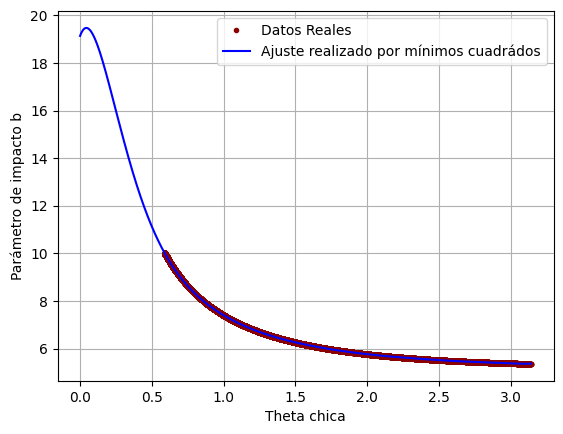

In [11]:
x_2 = np.linspace(0,np.pi,10000)
y_2 = evaluar_polinomio(coef_1,x_2)

plt.plot(theta_values_2, b_values_2 ,'.',label='Datos Reales', color='darkred')
plt.plot(x_2,y_2, label = 'Ajuste realizado por mínimos cuadrádos', color = 'b')
plt.xlabel('Theta chica')
plt.ylabel('Parámetro de impacto b')
plt.legend()
plt.grid()

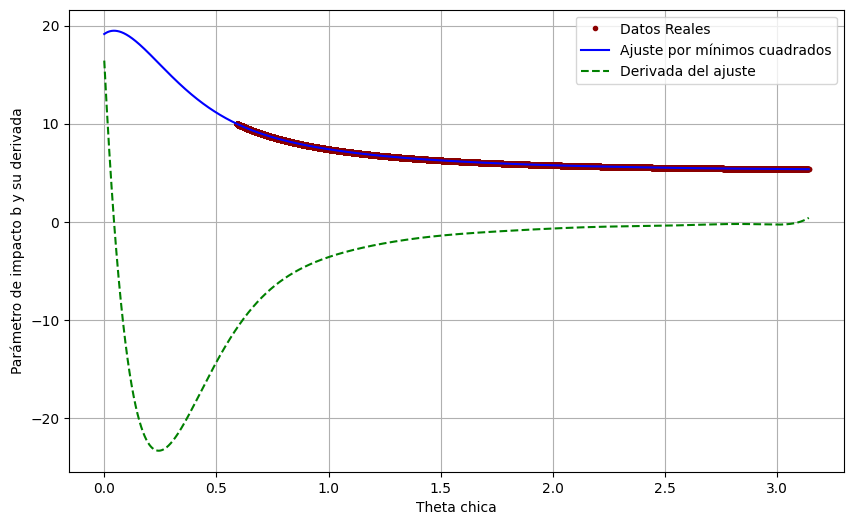

In [12]:
def derivar_polinomio(coeficientes, x):
    """Calcula la derivada de un polinomio y la evalúa."""
    y_derivada = np.zeros_like(x)
    for i in range(1, len(coeficientes)):
        y_derivada += i * coeficientes[i] * (x ** (i - 1))
    return y_derivada

# Calcular la derivada del polinomio ajustado
y_derivada_2 = derivar_polinomio(coef_1, x_2)

# Graficar la derivada junto con los datos originales y el ajuste
plt.figure(figsize=(10, 6))
plt.plot(theta_values_2, b_values_2, '.', label='Datos Reales', color='darkred')
plt.plot(x_2, y_2, label='Ajuste por mínimos cuadrados', color='b')
plt.plot(x_2, y_derivada_2, label='Derivada del ajuste', color='green', linestyle='--')
plt.xlabel('Theta chica')
plt.ylabel('Parámetro de impacto b y su derivada')
plt.legend()
plt.grid()
plt.show()

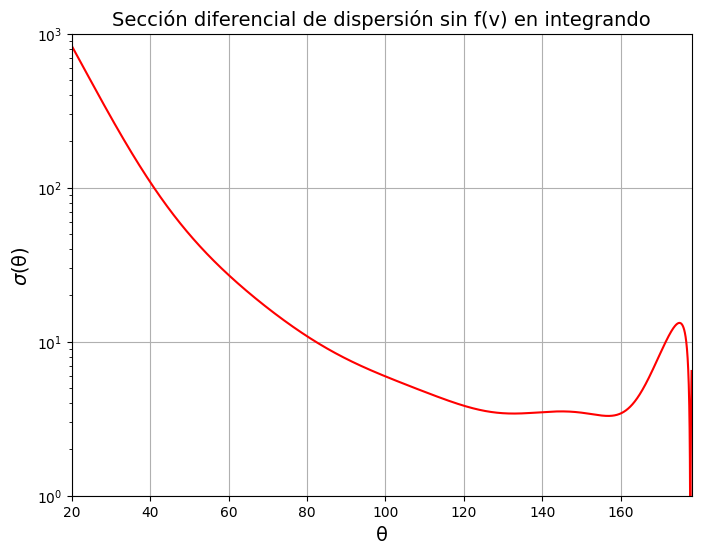

In [13]:
def dsigma_1(b, db, theta):
    ds = []
    theta_1 = []
    epsilon = 1e-10  # Umbral para evitar divisiones por valores muy pequeños
    for i in range(len(b)):
        if np.abs(np.sin(theta[i])) > epsilon and np.abs(db[i]) > epsilon:
            aux = b[i] / np.sin(theta[i]) * (np.abs(db[i]))
            ds.append(aux)
            theta_1.append(theta[i])
    return np.array(ds), np.array(theta_1)

dsigma_2, theta_2 = dsigma_1(y_2 ,y_derivada_2, x_2)
theta_2 = np.degrees(theta_2)

plt.figure(figsize=(8, 6))
plt.plot(theta_2, dsigma_2, color='r', label = 'numérico')
plt.yscale('log')
plt.xlabel("θ", fontsize=14)
plt.ylabel("$\sigma$(θ) ", fontsize=14)
plt.title("Sección diferencial de dispersión sin f(v) en integrando", fontsize=14)
plt.grid(True) # Ajustar el límite superior del eje y para una mejor visualización
plt.xlim(20,178)
plt.ylim(1,10e2)
plt.savefig("v_1.a.png", dpi=300, bbox_inches='tight')
plt.show()